In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ikiearth/PVT-DATA/main/Chapter6_PVT%20Data.csv')
df

,Temperature,Rs,Gas Gravity,Oil API,Pbp
0,124.224811,983.507201,1.095773,27.378218,3094.473796
1,105.670201,1118.311927,1.264539,30.497141,2593.138497
2,220.984279,255.071907,0.840619,37.779038,1118.302194
3,244.728321,48.801731,1.109872,35.049613,232.011706
4,104.153879,75.385002,0.889540,24.543380,421.236666
...,...,...,...,...,...
244,104.019931,273.074402,0.830617,31.615851,1136.336659
245,153.868480,145.006939,0.855444,27.539107,783.000819
246,134.831647,91.510982,0.988292,31.875268,397.326261
247,199.504544,238.578634,0.963525,34.880735,940.892103


In [3]:
X = df.drop(['Pbp'], axis=1)
y = df['Pbp']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import RootMeanSquaredError

In [7]:
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential([Dense(units=20, input_shape=(4,), activation='relu'),
                    Dense(units=20, activation='relu'),
                    Dense(units=1)])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import Adam

In [11]:
model.compile(optimizer=Adam(learning_rate=1),
              loss='MeanSquaredError',
              metrics=['RootMeanSquaredError'])

In [12]:
history = model.fit(X_train_scaled, y_train, batch_size = 96, epochs = 1000, shuffle=True)

Epoch 1/1000
3/3 [==============================] - 0s 2ms/step - loss: 2246522.0000 - root_mean_squared_error: 1498.8402
Epoch 2/1000
3/3 [==============================] - 0s 1ms/step - loss: 6716131.0000 - root_mean_squared_error: 2591.5498
Epoch 3/1000
3/3 [==============================] - 0s 1ms/step - loss: 1937466.5000 - root_mean_squared_error: 1391.9291
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 2770725.2500 - root_mean_squared_error: 1664.5496
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 2846548.5000 - root_mean_squared_error: 1687.1718
Epoch 6/1000
3/3 [==============================] - 0s 951us/step - loss: 2847159.2500 - root_mean_squared_error: 1687.3528
Epoch 7/1000
3/3 [==============================] - 0s 800us/step - loss: 2841811.5000 - root_mean_squared_error: 1685.7673
Epoch 8/1000
3/3 [==============================] - 0s 887us/step - loss: 2834675.2500 - root_mean_squared_error: 1683.6494
Epoch 9/1000
3/3 [

Text(0, 0.5, 'loss')

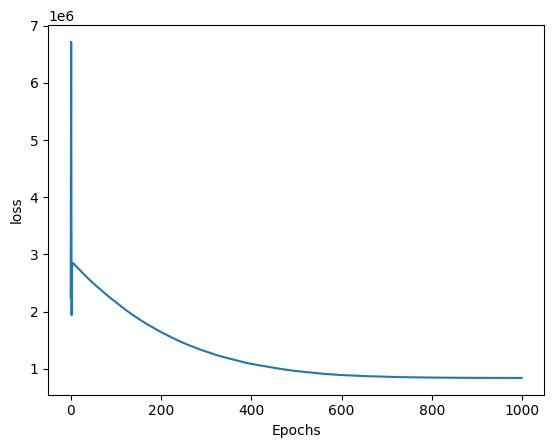

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'RMSE')

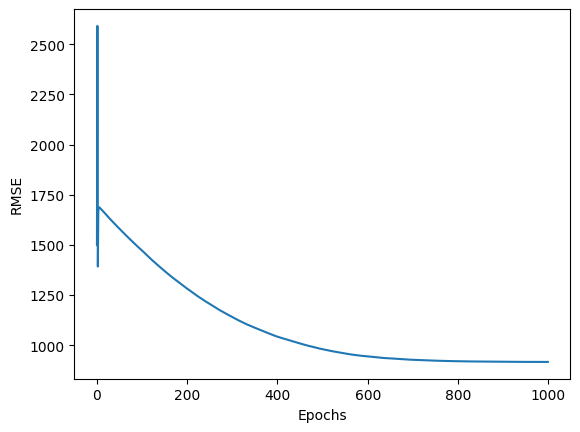

In [14]:
plt.plot(history.history['root_mean_squared_error'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')